# Standard Solow Model

Imports and set magics:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

# Model description

# Standard Solow Model:

$$
\begin{gathered}
Y_t=K_t^\alpha\left(A_t L_t\right)^{1-\alpha}, 0<\alpha<1 \\
K_{t+1}=S_t+(1-\delta) K_t \\
S_t=s Y_t, 0<s<1,0<\delta<1 \\
L_{t+1}=(1+n) L_t, n > -1 \\
A_{t+1}=(1+g) A_t, g \geq 0
\end{gathered}
$$
The production function is given by:
$$
Y_t = K_t^{\alpha}(A_tL_t)^{1-\alpha}
$$ 
It is a standard Cobb-Douglas production function which describes the total production as a function of capital stock $(K_t)$, workers $(L_t)$, and the level of technology $(A_t)$.

$Y_t$ is output in period $t$. <br>
$K_t$ is the capital stock in period $t$. <br>
$A_t$ is the level of technology in period $t$. <br>

The capital stock accumulates by
$$
K_{t+1} = sY_t + (1-\delta)K_t,
$$
where s is the exogenous savings rate  and $\delta$ is the rate at which capital depreciates. 


The labor force evolves as
$$
L_{t+1} = (1+n) L_t,
$$
where $n$ is the exogenous population growth rate. 

The level of technology evolves as
$$
A_{t+1} = (1+g) A_t,
$$
where $g$ is the exogenous technology growth rate. 

# Semi-endogenous Solow Model (Chp. 8)

$$Y_t = K_t^{\alpha} (A_t L_t)^{(1-\alpha)}, 1>\alpha>0$$
$$A_t=K_t^{\phi}, \phi<1$$
$$K_{t+1}=s Y_t +(1+\delta) K_t , 0<s<1,0<\delta<1 , K_t>0$$
$$L_{t+1}=(1+n)L_t, n\geq0$$


## Analytical Solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

## Numerical solution

We finde the numerical steady stae solution for $K_t$ and $Y_t$ using the f.solve method.

In [3]:
# Define the model parameters
alpha = 0.3
phi = 0.2
s = 0.2
delta = 0.1
n = 0.02

# Define the production function and technological progress function
def production(K, L, A):
    return K**alpha * (A*L)**(1-alpha)

def tech_progress(K, phi):
    return K**phi


# Define the system of equations to solve for the steady state
def steady_state_system(x):
    K, Y = x
    A = tech_progress(K, phi)
    dK_dt = s*production(K, 1, A) - (delta+n)*K
    dY_dt = n*Y + production(K, 1, A) - Y
    return [dK_dt, dY_dt]

# Find the steady state numerically using the fsolve function from scipy.optimize
K_ss, Y_ss = optimize.fsolve(steady_state_system, [1, 1])

# Print the results
print("Steady state capital stock: ", K_ss)
print("Steady state GDP: ", Y_ss)

Steady state capital stock:  2.489765710467247
Steady state GDP:  1.524346353347294


The above simulations solves the Solow model above using the initial values we have assigned to the parameter. It finds the steady state for GDP and Capital Stock. 


Now we add a share of labor income in GDP and find the new steady state:

In [9]:
w = 0.2  # Share of labor income in GDP


# Define the system of equations to solve for the steady state
def steady_state_system(x):
    K, Y = x
    A = tech_progress(K, phi)
    dK_dt = s*production(K, 1, A) - (delta+n)*K
    dY_dt = n*Y + (1-w)*production(K, 1, A) - Y
    return [dK_dt, dY_dt]

# Find the steady state numerically using the fsolve function from scipy.optimize
K_ss, Y_ss = optimize.fsolve(steady_state_system, [1, 1])

# Print the results
print("Steady state capital stock: ", K_ss)
print("Steady state GDP: ", Y_ss)

Steady state capital stock:  2.489765710467246
Steady state GDP:  1.2194770826778352


When we add a share of labour income to the GDP. From this we see, that a higher sahre of labor income results in a lower GDP.

Now we simulate the Solow model using the Euler method, with the initial capital stock set to 1 and the initial GDP per worker calculated using the production function and technological progress function. 

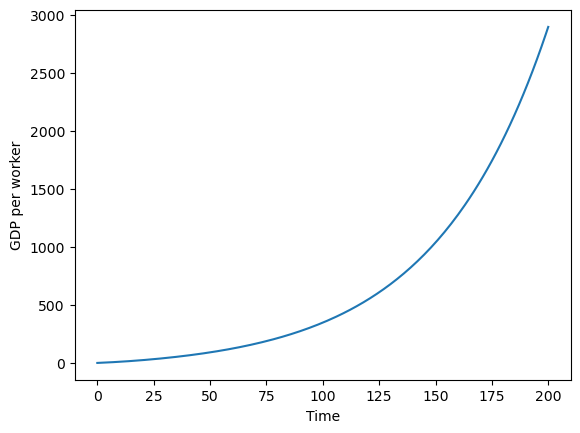

In [10]:
# Define the production function and technological progress function
def production(K, L, A):
    return K**alpha * (A*L)**(1-alpha)

def tech_progress(K, phi):
    return K**phi

# Define the system of equations for the Solow model
def solow_model(K, Y, A):
    dK_dt = s*production(K, 1, A) - (delta+n)*K
    dY_dt = n*Y + (1-w)*production(K, 1, A)
    return dK_dt, dY_dt

# Define the initial conditions
K0 = 1
Y0 = production(K0, 1, tech_progress(K0, phi))

# Define the simulation parameters
T = 200
dt = 1.0

# Define the arrays to store the simulation results
K_path = np.zeros(T+1)
Y_path = np.zeros(T+1)
A_path = np.zeros(T+1)

# Set the initial values
K_path[0] = K0
Y_path[0] = Y0
A_path[0] = tech_progress(K0, phi)

# Simulate the Solow model using the Euler method
for t in range(T):
    K, Y, A = K_path[t], Y_path[t], A_path[t]
    dK_dt, dY_dt = solow_model(K, Y, A)
    K_path[t+1] = K + dK_dt*dt
    Y_path[t+1] = Y + dY_dt*dt
    A_path[t+1] = tech_progress(K_path[t+1], phi)

# Plot the results
t_values = np.arange(T+1)
y_values = Y_path  # GDP per worker
plt.plot(t_values, y_values)
plt.xlabel('Time')
plt.ylabel('GDP per worker')
plt.show()

## Simulation of the Solow Model

We now run the simulations but as a function

In [11]:
def sim_solow():
    # Define the initial conditions
    K0 = 1
    Y0 = production(K0, 1, tech_progress(K0, phi))

    # Define the simulation parameters
    T = 200
    dt = 1.0

    # Define the arrays to store the simulation results
    K_path = np.zeros(T+1)
    Y_path = np.zeros(T+1)
    A_path = np.zeros(T+1)

    # Set the initial values
    K_path[0] = K0
    Y_path[0] = Y0
    A_path[0] = tech_progress(K0, phi)
    
    # Plot the results
    t_values = np.arange(T+1)
    y_values = Y_path  # GDP per worker
    
    
    # Create lambdified functions for numerical evaluation
    dK_dt_func = sm.lambdify([sm.Symbol('K'), sm.Symbol('Y')], steady_state_system([sm.Symbol('K'), sm.Symbol('Y')])[0])
    dY_dt_func = sm.lambdify([sm.Symbol('K'), sm.Symbol('Y')], steady_state_system([sm.Symbol('K'), sm.Symbol('Y')])[1])

    # Simulate the Solow model using the Euler method
    for t in range(T):
        K, Y, A = K_path[t], Y_path[t], A_path[t]
        dK_dt = dK_dt_func(float(K), float(Y))  # Convert to float values
        dY_dt = dY_dt_func(float(K), float(Y))  # Convert to float values
        K_path[t+1] = K + dK_dt*dt
        Y_path[t+1] = Y + dY_dt*dt
        A_path[t+1] = tech_progress(K_path[t+1], phi)

    return K_path, Y_path, A_path


We look at how the model will be affected if we change the value for alpha

We now add the values for alpha = 0.3 & 0.4

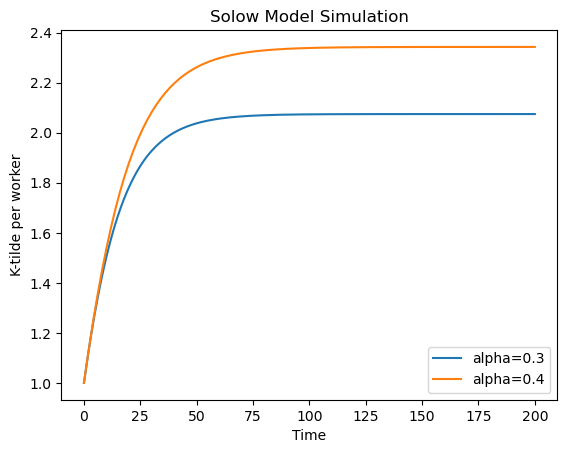

In [12]:
#Define the systems of equations for the Solow model
# Define the model parameters


alpha = 0.3
phi = 0.2
s = 0.2
delta = 0.1
n = 0.02

K_path, Y_path, A_path = sim_solow()

alpha = 0.4

K_path2, Y_path2, A_path2 = sim_solow()
# Plot the results
time = np.arange(len(K_path))
plt.plot(K_path / A_path, label="alpha=0.3")
plt.plot(K_path2 / A_path2, label="alpha=0.4")
plt.xlabel('Time')
plt.ylabel('K-tilde per worker')
plt.title('Solow Model Simulation')
plt.legend()
plt.show()

The plot above shows that a higher alpha results in a higher K-tilde. This follows the expected development of the model. 

## Further Analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

Now adding technological growth and plotting capital per worker against gdp per worker:

Steady state value of capital per worker:  0.48508155097021366
Steady state value of output per worker:  0.33805994591060196


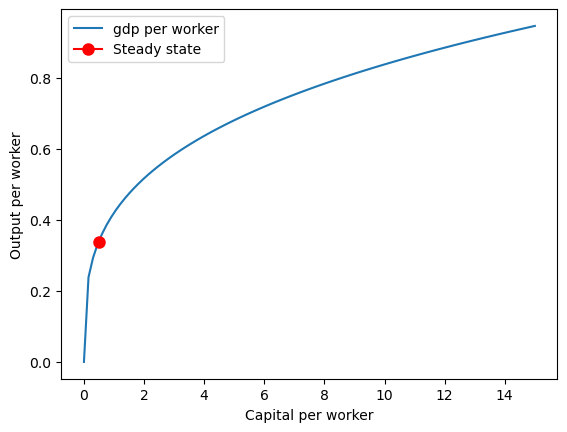

In [13]:
# Function to calculate the steady state value of capital per worker
def k_star(s, alpha, delta, n, g):
    return ((s/(n+g+delta))**(1/(1-alpha))) * ((n+g+delta)/alpha)

# Function to calculate the steady state value of output per worker
def y_star(s, alpha, delta, n, g):
    return k_star(s, alpha, delta, n, g)**alpha * (n+g+delta)

# Parameter values
alpha = 0.3
phi = 0.2
s = 0.2
delta = 0.1
n = 0.02
g = 0.3

# Calculate steady state values
k_star_val = k_star(s, alpha, delta, n, g)
y_star_val = y_star(s, alpha, delta, n, g)

# Print steady state values
print("Steady state value of capital per worker: ", k_star_val)
print("Steady state value of output per worker: ", y_star_val)

# Plot the Solow diagram
k_vals = np.linspace(0, 15, 100)
y_vals = k_vals**alpha * (n+g+delta)
plt.plot(k_vals, y_vals, label="gdp per worker")
plt.plot([k_star_val], [y_star_val], marker='o', markersize=8, color="red", label="Steady state")
plt.xlabel("Capital per worker")
plt.ylabel("Output per worker")
plt.legend()
plt.show()

# Conclusion

Add concise conclusion. 